# Part 3 - Minimum Spanning Trees

## Prim's Algorithm

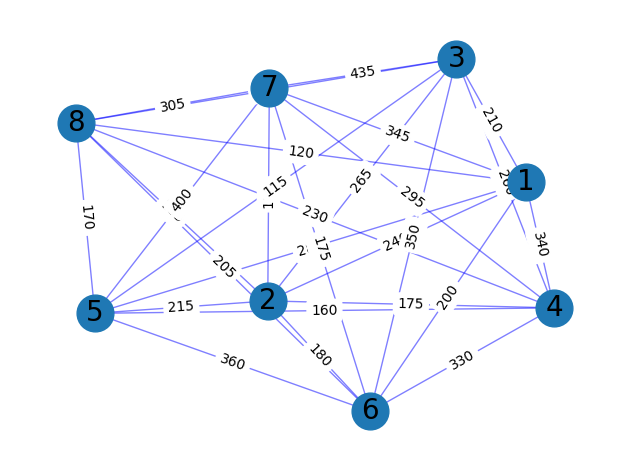

In [103]:
import networkx as nx
import matplotlib.pyplot as plt
import heapq
import random
import time


G = nx.Graph()
G.add_node('1')
G.add_node('2')
G.add_node('3')
G.add_node('4')
G.add_node('5')
G.add_node('6')
G.add_node('7')
G.add_node('8')

G.add_edge('1', '2', weight='240')
G.add_edge('1', '3', weight='210')
G.add_edge('1', '4', weight='340')
G.add_edge('1', '5', weight='280')
G.add_edge('1', '6', weight='200')
G.add_edge('1', '7', weight='345')
G.add_edge('1', '8', weight='120')
G.add_edge('2', '3', weight='265')
G.add_edge('2', '4', weight='175')
G.add_edge('2', '5', weight='215')
G.add_edge('2', '6', weight='180')
G.add_edge('2', '7', weight='185')
G.add_edge('2', '8', weight='155')
G.add_edge('3', '4', weight='260')
G.add_edge('3', '5', weight='115')
G.add_edge('3', '6', weight='350')
G.add_edge('3', '7', weight='435')
G.add_edge('3', '8', weight='195')
G.add_edge('4', '5', weight='160')
G.add_edge('4', '6', weight='330')
G.add_edge('4', '7', weight='295')
G.add_edge('4', '8', weight='230')
G.add_edge('5', '6', weight='360')
G.add_edge('5', '7', weight='400')
G.add_edge('5', '8', weight='170')
G.add_edge('6', '7', weight='175')
G.add_edge('6', '8', weight='205')
G.add_edge('7', '8', weight='305')


pos = nx.spring_layout(G, k=0.85, seed=1)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# edges
nx.draw_networkx_edges(G, pos, alpha=0.5, edge_color="b")

# node labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")

# edge weight labels
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()

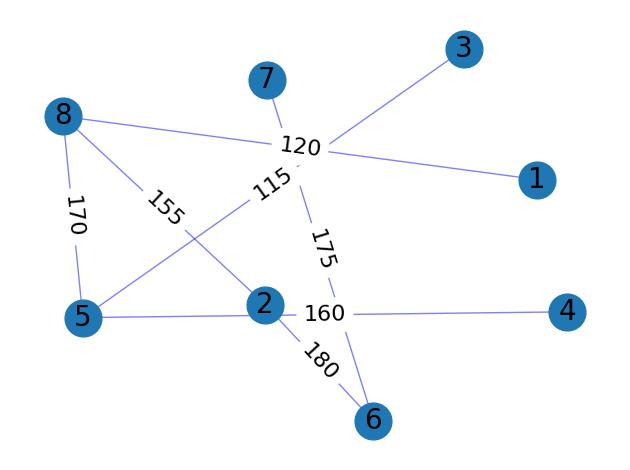

In [104]:
def prim(G):
    T = nx.Graph()
    visited = set()
    start_node = list(G.nodes())[0]  # Choose an arbitrary starting node

    # Add the starting node to the visited set
    visited.add(start_node)

    # Initialize the priority queue with the edges from the starting node
    pq = []
    for edge in G.edges(start_node, data=True):
        heapq.heappush(pq, (edge[2]['weight'], start_node, edge[1]))

    # Main loop
    while pq:
        # Pop the edge with the lowest weight
        weight, source, dest = heapq.heappop(pq)

        # If the destination node is already visited, skip
        if dest in visited:
            continue

        # Add the edge to the minimum spanning tree
        T.add_edge(source, dest, weight=weight)

        # Add the destination node to the visited set
        visited.add(dest)

        # Add the edges from the destination node to the priority queue
        for edge in G.edges(dest, data=True):
            if edge[1] not in visited:
                heapq.heappush(pq, (edge[2]['weight'], dest, edge[1]))

    return T


T = prim(G)

# Draw the MST
pos = nx.spring_layout(G, k=0.85, seed=1) # Set the positions of the nodes
nx.draw_networkx_nodes(G, pos, node_size=700) # Draw the nodes
nx.draw_networkx_edges(T, pos, alpha=0.5, edge_color="b") # Draw the edges of the MST in blue
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif") # Add node labels
edge_labels = nx.get_edge_attributes(T, "weight") # Get the edge weights as a dictionary
nx.draw_networkx_edge_labels(T, pos, edge_labels=edge_labels, font_size=16) # Add edge labels
plt.axis("off")
plt.tight_layout()
plt.show()

## Kruskal's Algorithm

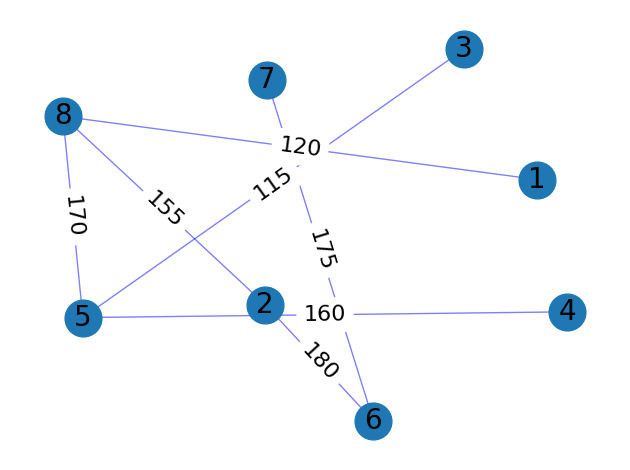

In [105]:
def kruskal(G):
    T = nx.Graph()

    # Sort the edges by weight
    edges = sorted(G.edges(data=True), key=lambda x: x[2]['weight'])

    # Create a union-find data structure to keep track of connected components
    uf = nx.utils.union_find.UnionFind(G.nodes())

    # Main loop
    for edge in edges:
        source = edge[0]
        dest = edge[1]

        # If the source and destination nodes are already connected, skip
        if uf[source] == uf[dest]:
            continue

        # Add the edge to the minimum spanning tree
        T.add_edge(source, dest, weight=edge[2]['weight'])

        # Merge the connected components
        uf.union(source, dest)

    return T



T = kruskal(G)

# Draw the MST
pos = nx.spring_layout(G, k=0.85, seed=1) # Set the positions of the nodes
nx.draw_networkx_nodes(G, pos, node_size=700) # Draw the nodes
nx.draw_networkx_edges(T, pos, alpha=0.5, edge_color="b") # Draw the edges of the MST in blue
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif") # Add node labels
edge_labels = nx.get_edge_attributes(T, "weight") # Get the edge weights as a dictionary
nx.draw_networkx_edge_labels(T, pos, edge_labels=edge_labels, font_size=16) # Add edge labels
plt.axis("off")
plt.tight_layout()
plt.show()

## Testing Performance of Prim's and Kruskal's

In [111]:
G_sparse = nx.gnm_random_graph(100, 10)
for (u, v) in G_sparse.edges():
    G_sparse[u][v]['weight'] = random.randint(1, 100)

G_dense = nx.gnm_random_graph(100, 4949)
for (u, v) in G_dense.edges():
    G_dense[u][v]['weight'] = random.randint(1, 10000)

# Function to test average runtimes of the algorithms on different graphs
def avg_runtimes(f, G):
    avg_runtime = 0
    for i in range(10):
        start_time = time.time()
        f(G)
        end_time = time.time()
        runtime = end_time - start_time
        avg_runtime += runtime
    avg_runtime /= 10
    return avg_runtime

# Testing Prim's on sparse graph
print(f"Average runtime of Prim's on sparse graph: {avg_runtimes(prim, G_sparse) * 1000} milliseconds")

# Testing Prim's on dense graph
print(f"Average runtime of Prim's on dense graph: {avg_runtimes(prim, G_dense) * 1000} milliseconds")

# Testing Kruskal's on sparse graph
print(f"Average runtime of Kruskals's on sparse graph: {avg_runtimes(kruskal, G_sparse) * 1000} milliseconds")

# Testing Kruskal's on dense graph
print(f"Average runtime of Kruskals's on dense graph: {avg_runtimes(kruskal, G_dense) * 1000} milliseconds")


Average runtime of Prim's on sparse graph: 0.008296966552734375 milliseconds
Average runtime of Prim's on dense graph: 6.121540069580078 milliseconds
Average runtime of Kruskals's on sparse graph: 0.09031295776367188 milliseconds
Average runtime of Kruskals's on dense graph: 18.630433082580566 milliseconds
